# Dynamical finite element method

We want to solve
$$
    \rho\partial_t^2 u = \partial_x\left(\mu\partial_xu\right) + f\,.
$$

In the numerical finite element method the equation turns out to be

$$
    \mathbf{u}(t+dt) = dt^2\big(M^\mathrm{T}\big)^{-1}\left[\mathbf{f}-
        \mathbf{K}^\mathrm{T}\cdot\mathbf{u}\right] + 2u(t) - u(t-dt)\,.
$$

In the limit of constant mass density and shear modulus the mass
and stiffness matrix are given by
$$
    \mathbf{M}=
    \frac{\rho h}{6}
    \begin{pmatrix}
            2&1&0&&&0\\
            1&4&1&0\\
            0&1&4&1&0\\
            &&&\ddots\\
            &&0&1&4&1\\
            0&&&&1&2
    \end{pmatrix}\,,
$$


$$
    \mathbf{K}=
    \frac{\mu}{h}
    \begin{pmatrix}
        1&-1&0&&&0\\
        -1&2&-1&0\\
        0&-1&2&-1&0\\
        &&&\ddots\\
        &&0&-1&2&-1\\
        0&&&&-1&1
    \end{pmatrix}\,.
$$

The source function is given by

$$
    f(t) = - \frac{2(t-t_0)}{\sigma^2}e^{-\frac{(t-t_0)^2}{\sigma^2}}
$$


In [1]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt

In [2]:
## INITIAL PARAMETERS ##

xmax = 10000                            # upper limit of the domain
xmin = 0                                # lower limit '' ''    ''
nx = 1000                               # # of grid points
dx = (xmax - xmin)/nx                   # spatial step 
c0 = 3000                               # sound velocity
rho = 2500                              # mass density
nx_src = int(0.25*nx)                   # source location in grid points
eps = 0.5                               # epsilon for the CFL criterion
nt = 1000                               # number of timesteps

mu = rho*c0**2                          # shear modulus

## INITIALIZING THE VECTORS ##

x = np.linspace(xmin, xmax, nx)         # domain
u = np.zeros(nx)                        # amplitude at time t
unew = np.zeros(nx)                     # amplitude at time t+dt
uold = np.zeros(nx)                     # amplitude at time t-dt
f = np.zeros(nx)                        # force vector


# Using the CLF criterion to set the time step

dt = eps*dx/c0                          # time step

t = np.linspace(0,nt*dt, nt)            # time vector

<IPython.core.display.Javascript object>


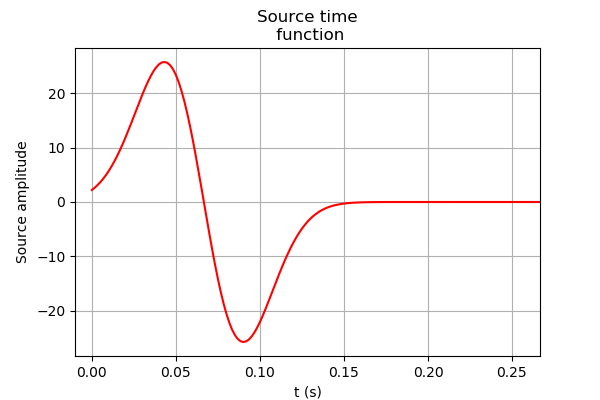

In [3]:
## THE SOURCE FUNCTION ##
t0 = dt*40
sigma = dt*20
 
src = -(2*(t-t0)/sigma**2)*np.exp(-(t-t0)**2/sigma**2)

fig, ax = plt.subplots(figsize = (6,4))

ax.set_xlim(np.min(t)-0.01,np.max(t) -1.4)
ax.set_ylim(1.1*np.min(src),1.1*np.max(src))
ax.set_xlabel('t (s)')
ax.set_ylabel('Source amplitude')
ax.set_title('Source time\n function')
ax.grid(True)

ax.plot(t,src, c = 'red')
plt.show()

In [4]:
## CONSTRUCTION OF THE MASS AND STIFFNESS MATRICES ##

M = np.zeros((nx,nx))
K = np.zeros((nx,nx))

for i in range (0, nx):
    for j in range (0, nx):
        if j == i:
            M[i,j] = 4
        elif j == i+1 or j == i-1:
            M[i,j] = 1
        else:
            M[i,j] = 0
M[0,0] = 2
M[-1,-1] = 2
M = M*rho*dx/6

for i in range (0, nx):
    for j in range (0, nx):
        if j == i:
            K[i,j] = 2
        elif j == i+1 or j == i-1:
            K[i,j] = -1
        else:
            K[i,j] = 0
K[0,0] = 1
K[-1,-1] = 1
K = K*mu/dx

<IPython.core.display.Javascript object>


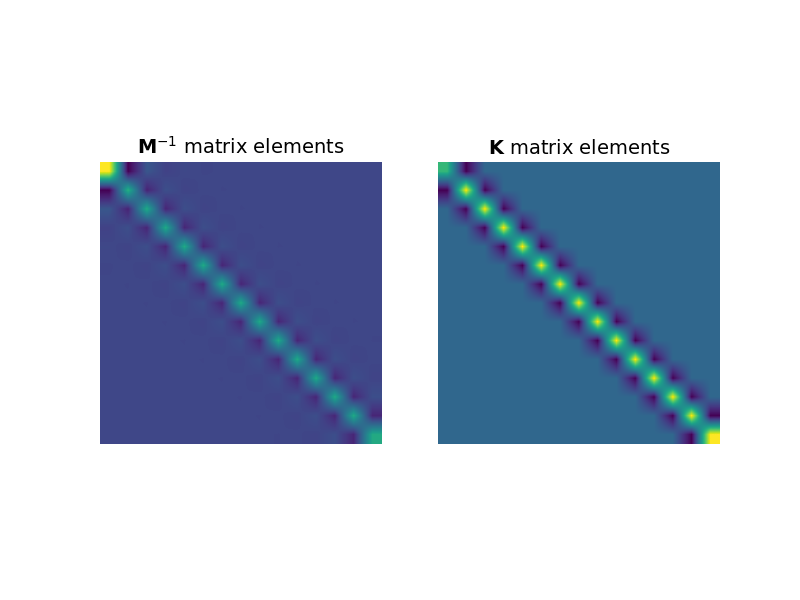

In [5]:
fig, axs = plt.subplots(1, 2, figsize = (8,6))

im1 = axs[0].imshow(np.linalg.inv(M)[0:15,0:15], interpolation = 'bilinear', cmap = 'viridis')
axs[0].set_title('$\mathbf{M}^{-1}$ matrix elements', fontsize = 14)
axs[0].axis('off')

im2 = axs[1].imshow(K[0:15,0:15], interpolation = 'bilinear', cmap = 'viridis')
axs[1].set_title('$\mathbf{K}$ matrix elements', fontsize = 14)
axs[1].axis('off')

#cbar_ax1 = fig.add_axes([0.45, 0.15, 0.02, 0.71])
#fig.colorbar(im1, cax=cbar_ax1)

#cbar_ax2 = fig.add_axes([0.87, 0.15, 0.02, 0.71])
#fig.colorbar(im2, cax=cbar_ax2)

#plt.tight_layout()
plt.show()

$$
    \mathbf{u}(t+dt) = dt^2\big(M^\mathrm{T}\big)^{-1}\left[\mathbf{f}-
        \mathbf{K}^\mathrm{T}\cdot\mathbf{u}\right] + 2u(t) - u(t-dt)\,.
$$

<IPython.core.display.Javascript object>


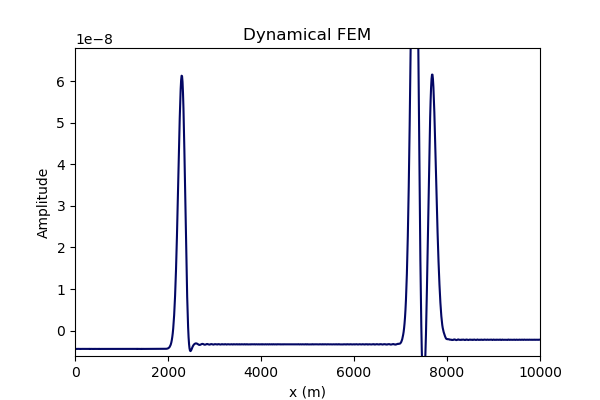

In [8]:
Minv = np.linalg.inv(M)

fig, ax = plt.subplots(figsize = (6,4))

ax.set_title('Dynamical FEM')
ax.set_xlim(np.min(x), np.max(x))
ax.set_xlabel('x (m)')
ax.set_ylabel('Amplitude')
line, = ax.plot(x, u, color = 'xkcd:darkblue')



In [9]:
for i in range(nt):
    f[nx_src] = src[i]
    unew = dt**2*Minv@(f - K@u ) + 2*u - uold
    uold, u = u, unew
    if i%5 == 0:
        line.set_ydata(unew)
        plt.gcf().canvas.draw()


## Investigate why: I need to run the code twice to see the animation